In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
Csvpath = "30312_weather_traffic_FINAL.csv"
zip_30312_df = pd.read_csv(Csvpath)
zip_30312_df

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,0,NaN,30312,USA,01/01/2019,65.1,56.4,61.5,NaN,NaN,...,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,1,NaN,30312,USA,01/02/2019,57.0,49.0,52.4,46.3,NaN,...,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,2,NaN,30312,USA,01/03/2019,54.3,50.1,52.5,NaN,NaN,...,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,3,NaN,30312,USA,01/04/2019,64.8,45.1,54.5,40.1,NaN,...,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
4,4,NaN,30312,USA,01/05/2019,57.8,43.7,48.8,36.4,NaN,...,64.92,Partially cloudy,0,0,1,0,0,1,1,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,NaN,30312,Atlanta,12/27/2018,52.9,46.6,49.1,41.0,NaN,...,71.41,"Rain, Overcast",0,0,0,0,0,0,0,30312
726,726,NaN,30312,Atlanta,12/28/2018,62.0,49.7,55.5,45.3,NaN,...,96.22,"Rain, Overcast",0,2,4,0,2,4,6,30312
727,727,NaN,30312,Atlanta,12/29/2018,59.6,46.1,52.2,44.5,NaN,...,82.07,Partially cloudy,0,0,2,0,0,2,2,30312
728,728,NaN,30312,Atlanta,12/30/2018,54.4,50.0,52.0,48.3,NaN,...,94.93,"Rain, Overcast",0,0,2,0,0,2,2,30312


In [30]:
zip_30312_df_reduced = zip_30312_df.loc[(zip_30312_df["Precipitation"]>0),:]
zip_30312_df_reduced

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
0,0,NaN,30312,USA,01/01/2019,65.1,56.4,61.5,NaN,NaN,...,90.30,"Rain, Partially cloudy",0,0,2,0,1,1,2,30312
1,1,NaN,30312,USA,01/02/2019,57.0,49.0,52.4,46.3,NaN,...,91.80,"Rain, Overcast",0,0,1,0,0,1,1,30312
2,2,NaN,30312,USA,01/03/2019,54.3,50.1,52.5,NaN,NaN,...,95.95,"Rain, Overcast",0,2,2,0,1,3,4,30312
3,3,NaN,30312,USA,01/04/2019,64.8,45.1,54.5,40.1,NaN,...,86.19,"Rain, Overcast",0,0,4,0,3,1,4,30312
11,11,NaN,30312,USA,01/12/2019,42.8,37.2,40.7,29.3,NaN,...,60.15,"Rain, Overcast",0,0,3,0,1,2,3,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,718,NaN,30312,Atlanta,12/20/2018,51.1,45.7,48.5,40.0,NaN,...,91.22,"Rain, Overcast",0,0,0,3,2,1,3,30312
719,719,NaN,30312,Atlanta,12/21/2018,50.2,39.5,45.3,31.5,NaN,...,89.58,"Rain, Overcast",0,3,0,0,2,1,3,30312
725,725,NaN,30312,Atlanta,12/27/2018,52.9,46.6,49.1,41.0,NaN,...,71.41,"Rain, Overcast",0,0,0,0,0,0,0,30312
726,726,NaN,30312,Atlanta,12/28/2018,62.0,49.7,55.5,45.3,NaN,...,96.22,"Rain, Overcast",0,2,4,0,2,4,6,30312


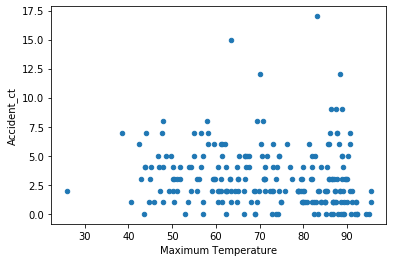

In [17]:
zip_30312_df_reduced.plot.scatter('Maximum Temperature', 'Accident_ct')

Text(0, 0.5, 'Sum of accidents')

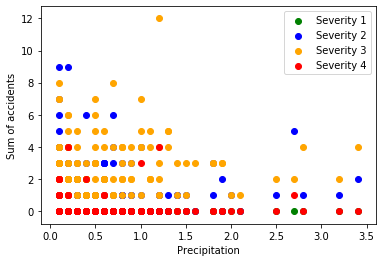

In [22]:
x = zip_30312_df_reduced["Precipitation"]
y1 = zip_30312_df_reduced["Severity_1"]
y2 = zip_30312_df_reduced["Severity_2"]
y3 = zip_30312_df_reduced["Severity_3"]
y4 = zip_30312_df_reduced["Severity_4"]
plt.scatter(x,y1,color='green', label = "Severity 1")
plt.scatter(x,y2,color='blue',label = "Severity 2")
plt.scatter(x,y3,color='orange',label = "Severity 3")
plt.scatter(x,y4,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Precipitation")
plt.ylabel("Sum of accidents")

In [23]:
zip_30312_df_reduced_hum = zip_30312_df.loc[zip_30312_df["Relative Humidity"]>75,:]

Text(0, 0.5, 'Sum of accidents')

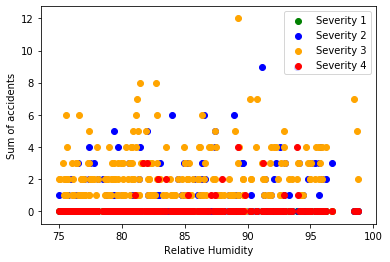

In [24]:
x_hum = zip_30312_df_reduced_hum["Relative Humidity"]
y1_hum = zip_30312_df_reduced_hum["Severity_1"]
y2_hum = zip_30312_df_reduced_hum["Severity_2"]
y3_hum = zip_30312_df_reduced_hum["Severity_3"]
y4_hum = zip_30312_df_reduced_hum["Severity_4"]
plt.scatter(x_hum,y1_hum,color='green', label = "Severity 1")
plt.scatter(x_hum,y2_hum,color='blue',label = "Severity 2")
plt.scatter(x_hum,y3_hum,color='orange',label = "Severity 3")
plt.scatter(x_hum,y4_hum,color='red',label = "Severity 4")
plt.legend(loc = 'upper right')
plt.xlabel("Relative Humidity")
plt.ylabel("Sum of accidents")

In [26]:
zip_30312_df_baseline = zip_30312_df.loc[(zip_30312_df["Precipitation"]==0),:]
zip_30312_df_baseline

,Unnamed: 0,Location,Address,Country,Date,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,...,Relative Humidity,Conditions,Severity_1,Severity_2,Severity_3,Severity_4,Residential_ct,Interstate_ct,Accident_ct,Zipcode
4,4,NaN,30312,USA,01/05/2019,57.8,43.7,48.8,36.4,NaN,...,64.92,Partially cloudy,0,0,1,0,0,1,1,30312
5,5,NaN,30312,USA,01/06/2019,68.5,41.6,52.8,38.2,NaN,...,62.19,Clear,0,1,1,0,1,1,2,30312
6,6,NaN,30312,USA,01/07/2019,67.9,40.8,53.3,45.1,NaN,...,67.52,Partially cloudy,0,0,0,0,0,0,0,30312
7,7,NaN,30312,USA,01/08/2019,64.5,48.9,56.1,48.1,NaN,...,77.43,Partially cloudy,0,4,1,0,3,2,5,30312
8,8,NaN,30312,USA,01/09/2019,56.1,39.3,46.7,30.3,NaN,...,41.08,Clear,0,2,2,0,1,3,4,30312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,722,NaN,30312,Atlanta,12/24/2018,52.0,33.7,42.1,27.2,NaN,...,69.80,Clear,0,0,2,0,1,1,2,30312
723,723,NaN,30312,Atlanta,12/25/2018,56.6,30.4,43.5,38.5,NaN,...,67.35,Partially cloudy,0,0,1,0,0,1,1,30312
724,724,NaN,30312,Atlanta,12/26/2018,57.9,36.6,47.1,34.2,NaN,...,69.09,Partially cloudy,0,1,1,0,1,1,2,30312
727,727,NaN,30312,Atlanta,12/29/2018,59.6,46.1,52.2,44.5,NaN,...,82.07,Partially cloudy,0,0,2,0,0,2,2,30312


{'whiskers': [<matplotlib.lines.Line2D at 0x2a6a5903be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6a59122b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6a5903908>,
 'medians': [<matplotlib.lines.Line2D at 0x2a6a5912940>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a6a5912f98>,
 'means': [<matplotlib.lines.Line2D at 0x2a6a5912c88>,
  <matplotlib.lines.Line2D at 0x2a6a5929748>]}

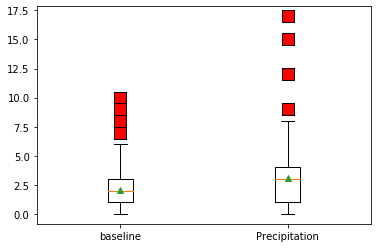

In [33]:
x1 = zip_30312_df_baseline["Accident_ct"]
x2 = x1.fillna(0)
x3 = zip_30312_df_reduced["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x2,x3], labels = ['baseline','Precipitation'], flierprops = flierprops, showmeans=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x2a6a5992710>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6a5992da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6a5992438>,
 'medians': [<matplotlib.lines.Line2D at 0x2a6a599c470>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a6a599cac8>,
 'means': [<matplotlib.lines.Line2D at 0x2a6a599c7b8>,
  <matplotlib.lines.Line2D at 0x2a6a59d7748>]}

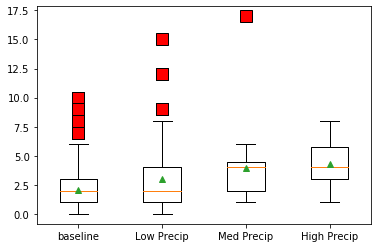

In [37]:
low_precip = zip_30312_df_reduced.loc[zip_30312_df_reduced["Precipitation"]<1,:]
med_precip = zip_30312_df_reduced.loc[(zip_30312_df_reduced["Precipitation"]>1)
                                      &(zip_30312_df_reduced["Precipitation"]<2),:]
high_precip = zip_30312_df_reduced.loc[zip_30312_df_reduced["Precipitation"]>2,:]
x4 = low_precip["Accident_ct"]
x5 = med_precip["Accident_ct"]
x6 = high_precip["Accident_ct"]
flierprops = dict(marker='s', markerfacecolor='red', markersize=12)
plt.boxplot ([x2,x4,x5,x6], labels = ['baseline','Low Precip','Med Precip','High Precip'], flierprops = flierprops, showmeans=True)
